In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix,classification_report

import xgboost as xgb



In [ ]:
path='https://raw.githubusercontent.com/adityav1810/INSAID-CustomerChurnAnalysis/master/Churn.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
#lets have a look at our data 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Total Charges has cells which are empty,lets fill those up with 0's and also change the data type so that further EDA becomes easier
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [ ]:
#shape of dataset
df.shape

(7043, 21)

In [ ]:
#list all column names 
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Ready the Dataset for regression purpose 
df2['Churn'].replace({"Yes":1, "No":0}, inplace = True)
dummy_df=pd.get_dummies(df2)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   Partner_No                               7043 non-null   uint8  
 6   Partner_Yes                              7043 non-null   uint8  
 7   Dependents_No                            7043 non-null   uint8  
 8   Dependents_Yes                           7043 non-null   uint8  
 9   PhoneService_No                          7043 non-null   uint8  
 10  PhoneService_Yes                         7043 no

# Exploratory Data Analysis

We aim to find out the major causes of the churn in customers. To find this we must look at the effect of all the variables on the Churn Values


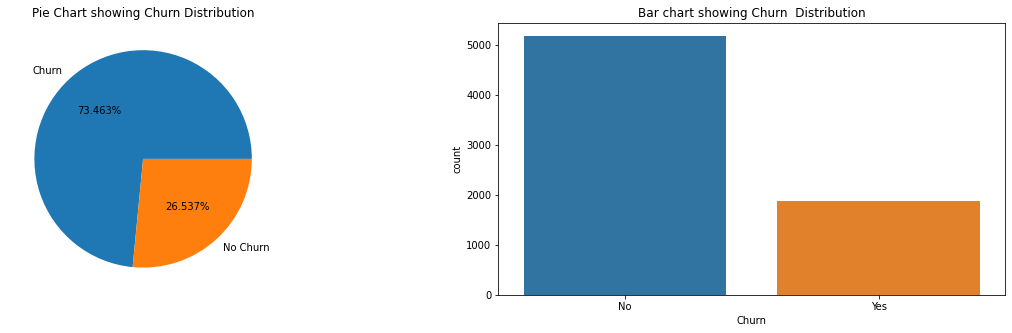

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.pie(df['Churn'].value_counts(),labels=['Churn','No Churn'],autopct = '%.3f%%')
plt.title('Pie Chart showing Churn Distribution')

plt.subplot(122)
sns.countplot(df['Churn'])
plt.title('Bar chart showing Churn  Distribution')
plt.show()

We divide the Tenure into monthly groups so as to determine if customers churn within a short period of time or a long period of time
We divided our tenure in 1,2,3,4,5 and more than 5 months


In [ ]:
def tenure_groups(df):
    if df['tenure'] <= 12:
        return "less_than_1"
    elif (df['tenure'] > 12) & (df['tenure'] <= 24):
        return "less_than_2"
    elif (df['tenure'] > 24) & (df['tenure'] <= 36):
        return "less_than_3"
    elif (df['tenure'] > 36) & (df['tenure'] <= 48):
        return "less_than_4"
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [ ]:
cpy_df=df.copy()

cpy_df['grouped_tenure'] = cpy_df.apply(lambda df: tenure_groups(df), axis = 1)

In [ ]:
cpy_df['grouped_tenure'].head().unique()

array(['less_than_1', 'less_than_3', 'less_than_4'], dtype=object)

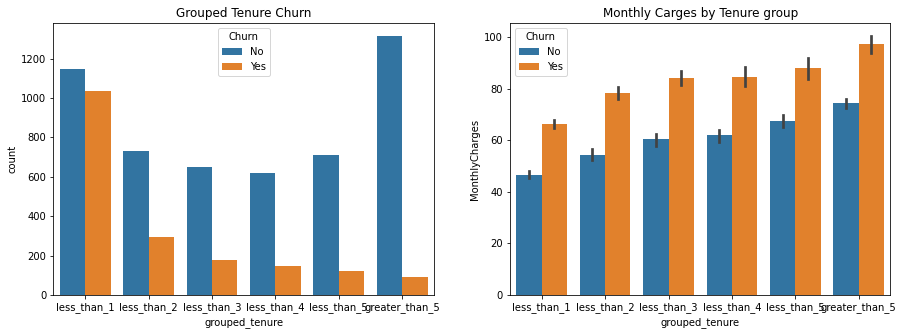

In [ ]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = cpy_df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5']).set(title='Grouped Tenure Churn')
plt.subplot(1,2,2)
sns.barplot(data = cpy_df, x = 'grouped_tenure', y = 'MonthlyCharges', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5']).set(title='Monthly Carges by Tenure group')
plt.show()

# EFFECT OF AGE AND GENDER ON THE CHURN OF CUSTOMER

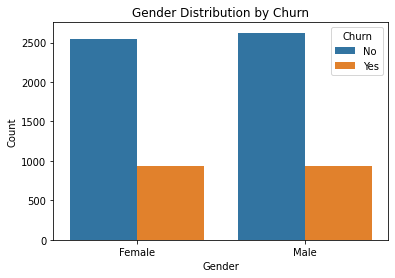

In [ ]:

plt.subplot(111)
a = sns.countplot(data = df, x = 'gender', hue = 'Churn')
a.set_title('Gender Distribution by Churn')
a.set_xlabel('Gender')
a.set_ylabel('Count')
plt.show()

There seems to be not much of an effect of Gender on The Churn as both male and female bar graphs are very similar

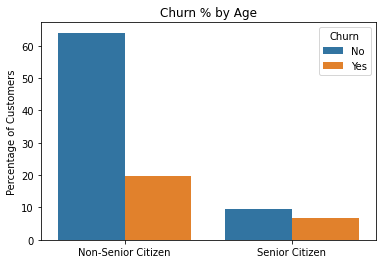

In [ ]:
df_cpy=df.copy()
df_cpy = df_cpy.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
t = sns.barplot('SeniorCitizen', y = 'pct_total', hue = 'Churn', data = df_cpy)
t.set_title('Churn % by Age')
t.set_xlabel('')
t.set_ylabel('Percentage of Customers')
t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'])
plt.show()


A higher proportion of senior citizens churn than non-senior citizens

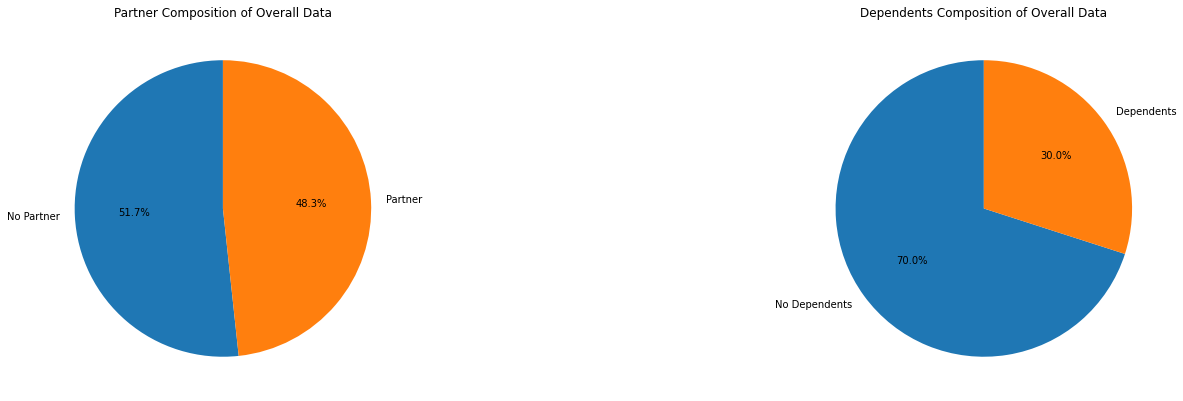

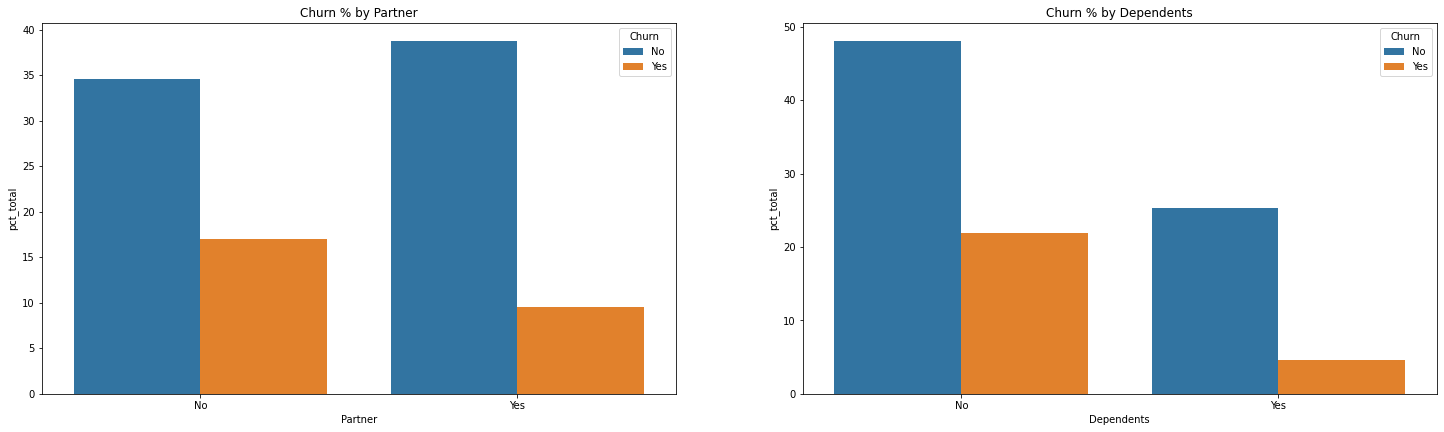

In [ ]:
fig = plt.figure(figsize = (25,15))
i=221
for col in ['Partner','Dependents']:
  plt.subplot(i)
  plt.pie(df[col].value_counts(), labels = ['No '+col, col], autopct = '%.1f%%', radius = 1, startangle = 90)
  plt.title(col+' Composition of Overall Data')
  i+=1


fig = plt.figure(figsize = (25,15))

i=221
for col in ['Partner','Dependents']:
  plt.subplot(i)
  df_cpy=df.copy()
  df_cpy=df_cpy.groupby(col)['Churn'].value_counts().to_frame()
  df_cpy=df_cpy.rename({'Churn':'pct_total'},axis=1).reset_index()
  df_cpy['pct_total']=(df_cpy['pct_total']/len(df))*100
  sns.barplot(col,y='pct_total',hue = 'Churn', data = df_cpy).set(title='Churn % by '+col)
  
  i+=1
plt.show()

Customers with Partners tend to churn more as compared to those without a partner

Customers without dependents are more likely to churn than those with dependents

# EFFECT OF PHONE SERVICES


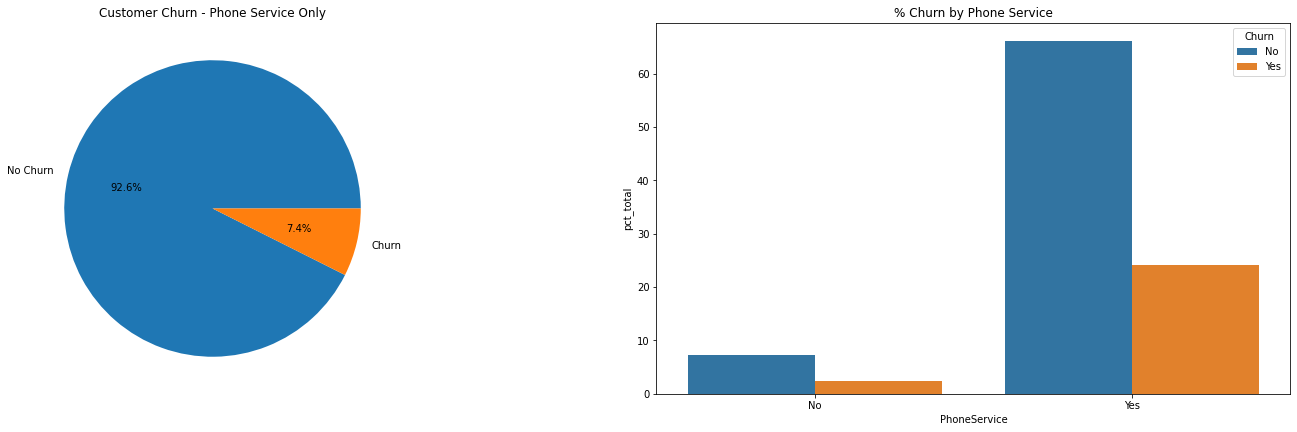

In [ ]:
phone_only = df[(df['PhoneService'] == 'Yes') & (df['InternetService'] == 'No')]
fig = plt.figure(figsize = (25, 15))
plt.subplot(221)
plt.pie(phone_only['Churn'].value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1)
plt.title('Customer Churn - Phone Service Only')
plt.subplot(222)
z = df.copy()
z = z.groupby('PhoneService')['Churn'].value_counts().to_frame()
z = z.rename({'Churn':'pct_total'}, axis = 1).reset_index()
z['pct_total'] = (z['pct_total']/len(df)) * 100
sns.barplot('PhoneService', y = 'pct_total', hue = 'Churn', data = z).set(title='% Churn by Phone Service')
plt.show()

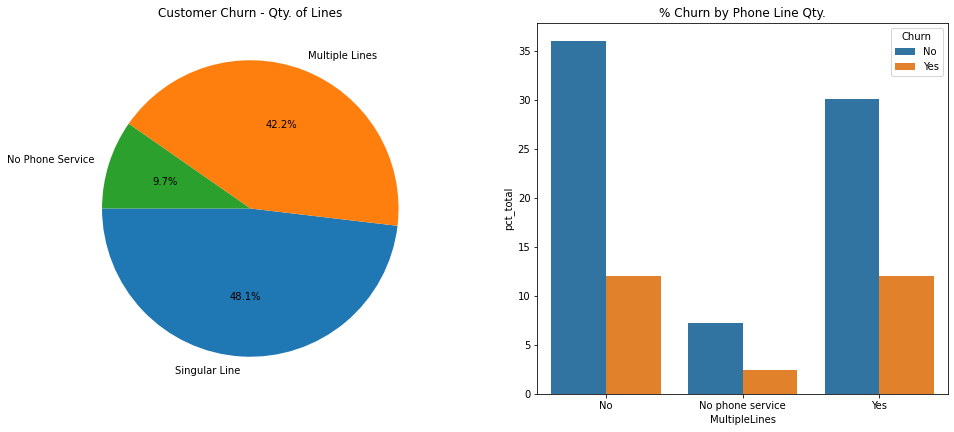

In [ ]:
fig = plt.figure(figsize = (25, 15))
plt.subplot(234)
plt.pie(df.MultipleLines.value_counts(), labels = ['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct = '%.1f%%', radius = 1, startangle = 180)
plt.title('Customer Churn - Qty. of Lines')
plt.subplot(235)
df_cpy = df.copy()
df_cpy = df_cpy.groupby('MultipleLines')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('MultipleLines', y = 'pct_total', hue = 'Churn', data = df_cpy).set(title='% Churn by Phone Line Qty.')
plt.show()

Significantly more customers with only phone service will not churn than those other customers

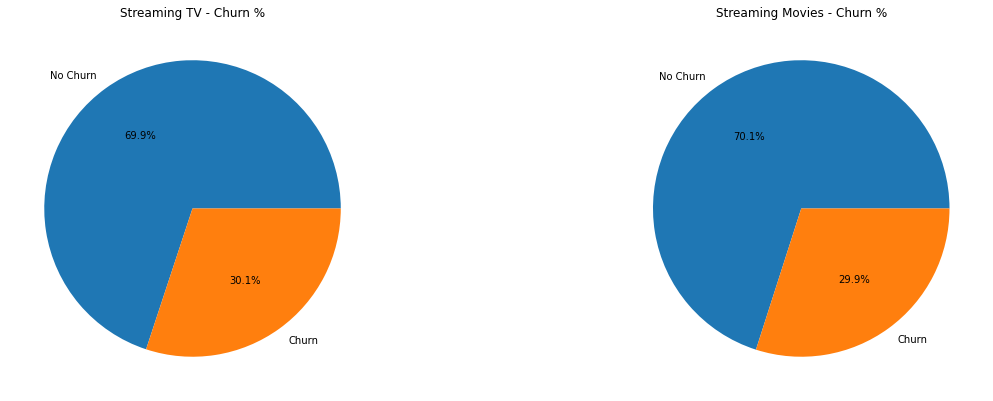

In [ ]:
df_cpy=df[df['InternetService']!='No']
fig=plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df_cpy5 = df_cpy[df_cpy.StreamingTV == 'Yes']
plt.pie(df_cpy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%')
plt.title('Streaming TV - Churn %') 
plt.subplot(2,2,2)
df_cpy6 = df_cpy[df_cpy.StreamingMovies == 'Yes']
plt.pie(df_cpy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%')
plt.title('Streaming Movies - Churn %')
plt.show()

Customers with TV Streaming and/or Movie streaming services churn more than all other services.

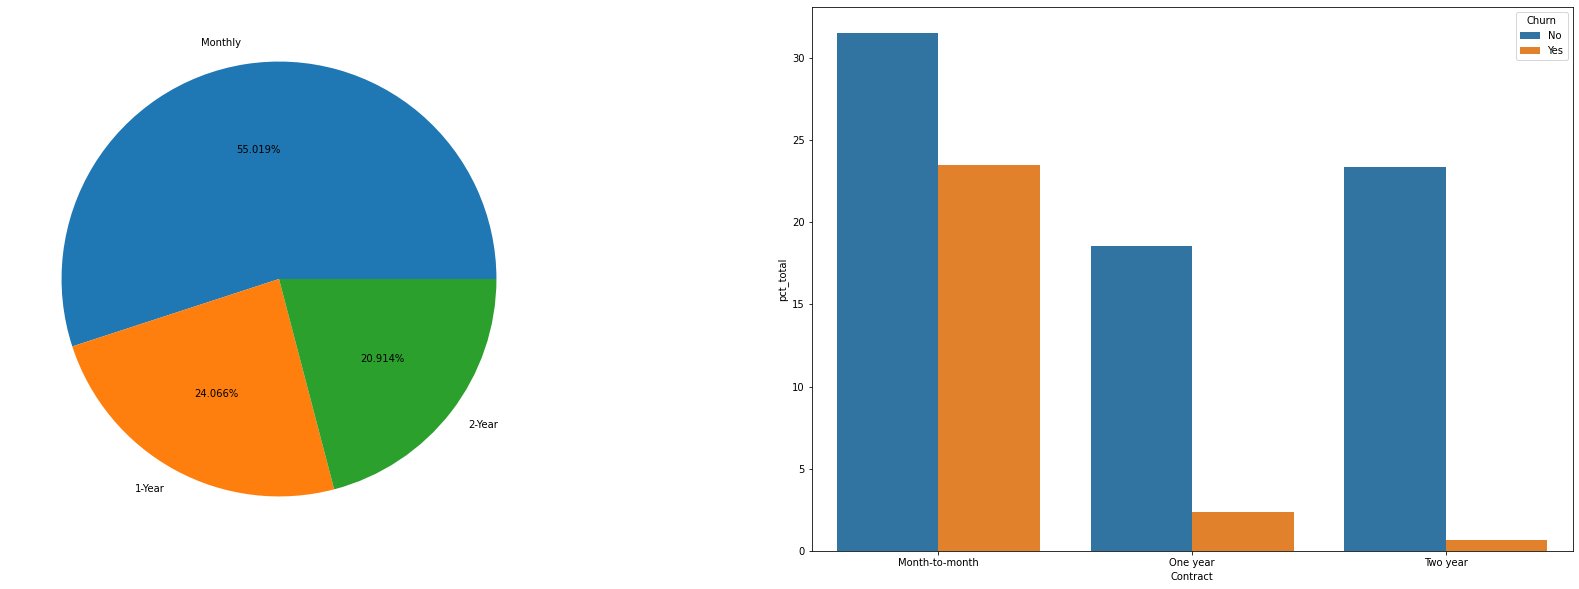

In [ ]:
fig=plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.pie(df['Contract'].value_counts(),labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.3f%%')

plt.subplot(1,2,2)
df_cpy=df.copy()
df_cpy = df_cpy.groupby('Contract')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('Contract', y = 'pct_total', hue = 'Churn', data = df_cpy)
plt.show()

More than half of customers use a monthly payment option
Significantly more customers churn on monthly plans
The longer the plan, the lower the churn rate

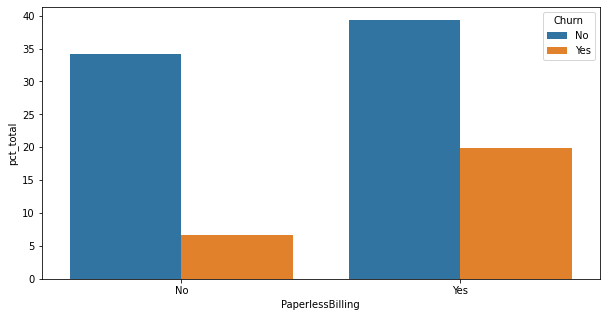

In [ ]:
fig=plt.figure(figsize=(10,5))
df_cpy=df.copy()
plt.subplot(111)
df_cpy = df_cpy.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
df_cpy = df_cpy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df_cpy['pct_total'] = (df_cpy['pct_total']/len(df)) * 100
sns.barplot('PaperlessBilling', y = 'pct_total', hue = 'Churn', data = df_cpy)
plt.show()

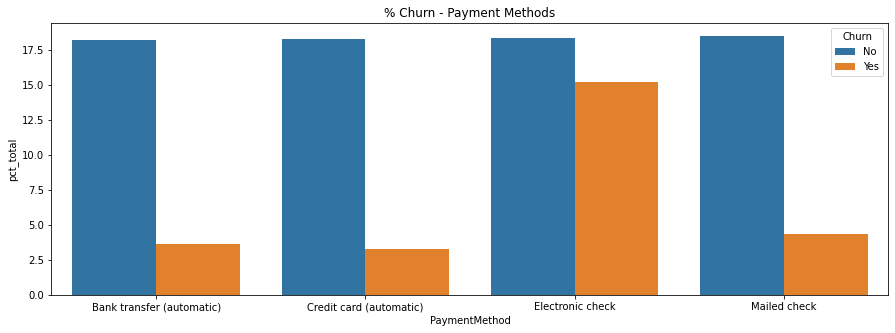

In [ ]:
df_cpy=df.copy()
fig=plt.figure(figsize=(15,5))
plt.subplot(111)
df_cpy=df_cpy.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
df_cpy=df_cpy.rename({'Churn':'pct_total'},axis=1).reset_index()
df_cpy['pct_total']=(df_cpy['pct_total']/len(df))*100
sns.barplot('PaymentMethod', 'pct_total', 'Churn', data = df_cpy).set(title='% Churn - Payment Methods')
plt.show()


Customers with non-paperless billing churn almost 15% more than paperless customers

#Lets Apply a Model on our DataSet

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dummy_df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
MultipleLine

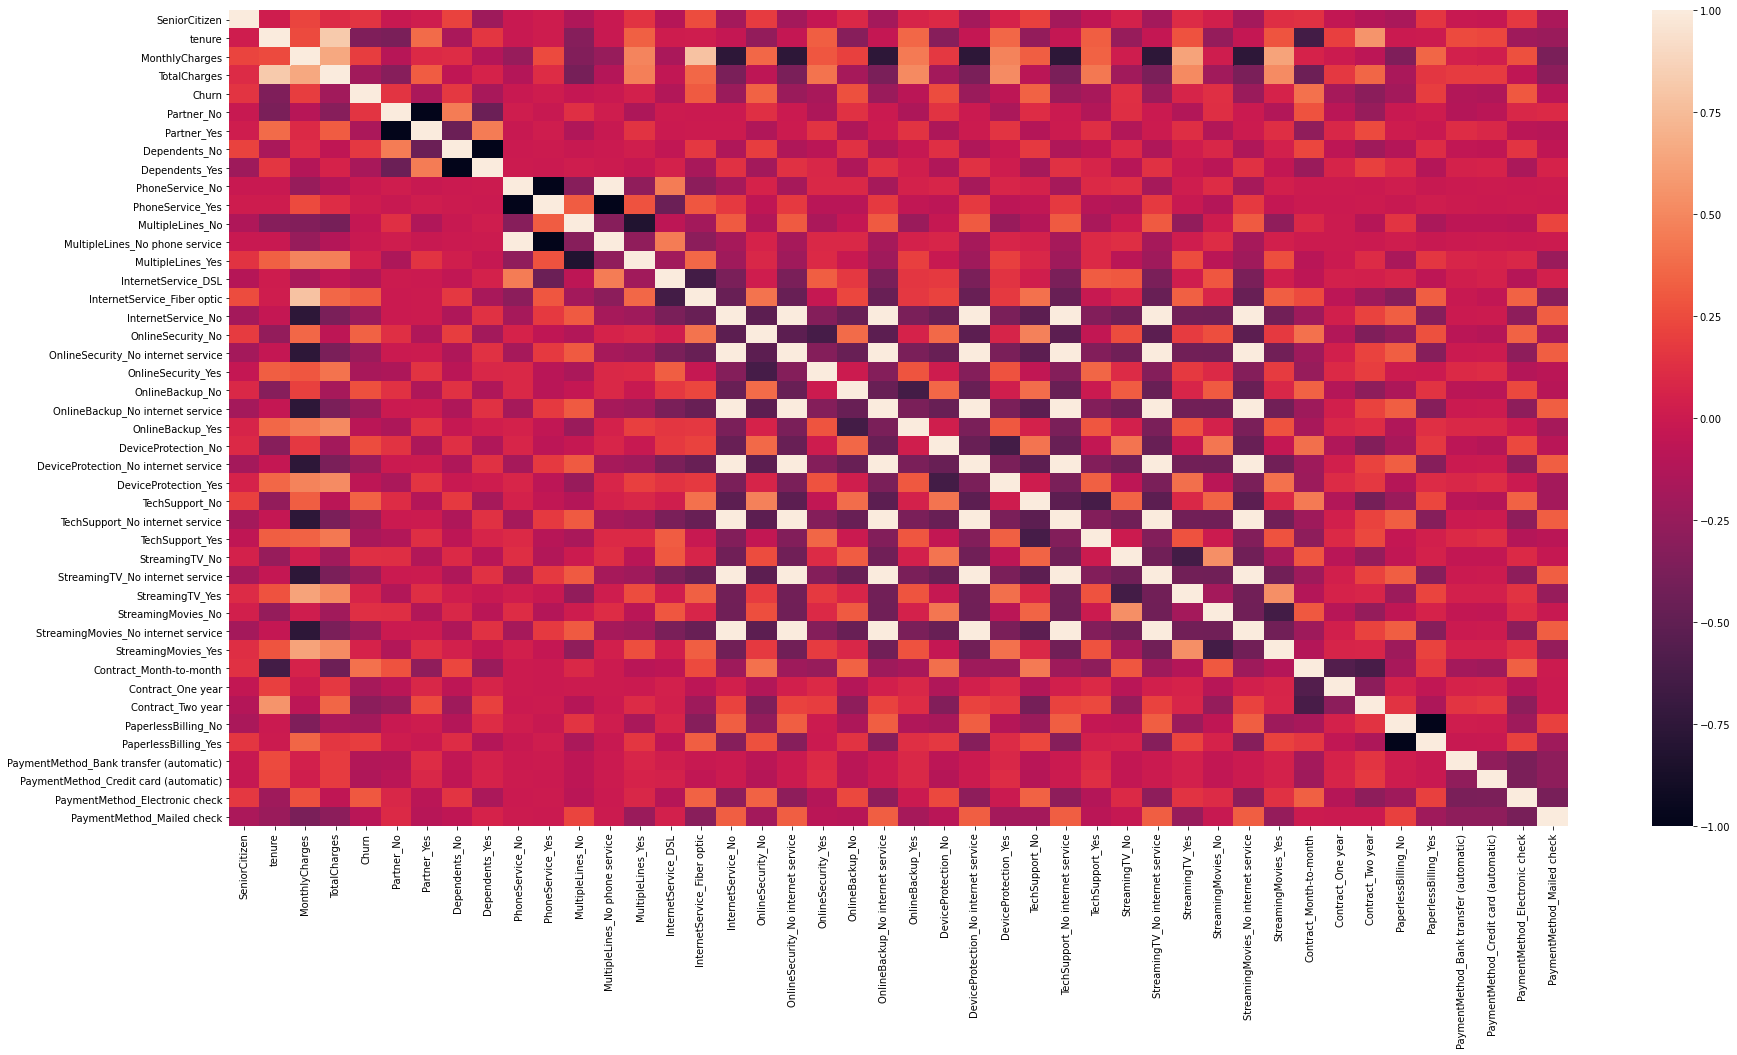

In [ ]:
plt.figure(figsize = (30, 15))
sns.heatmap(dummy_df.corr())
plt.show()


##From our heatmap and correlation values, we see that monthly contract, and a lack of online security or techsupport have the strongest positive correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn.

In [ ]:
y = dummy_df.Churn.values
X = dummy_df.drop('Churn', axis = 1)
cols = X.columns

In [ ]:
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
X.columns = cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .433, random_state = 33)

Logistic Regression


In [ ]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [ ]:
print(f"Precision Score: {precision_score(y_test, y_hat_test)}")
print(f"Recall Score: {recall_score(y_test, y_hat_test)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_hat_test)}")
print(f"F1 Score: {f1_score(y_test, y_hat_test)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,y_hat_test))

Precision Score: 0.6507462686567164
Recall Score: 0.5323565323565324
Accuracy Score: 0.7977049180327869
F1 Score: 0.5856279382135662

Confusion matrix:
  [[1997  234]
 [ 383  436]]


KNN Classifier


In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
test_preds1 = knn1.predict(X_test)
knn1.score(X_test, y_test)
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,test_preds1))

Precision Score: 0.5575342465753425
Recall Score: 0.49694749694749696
Accuracy Score: 0.759016393442623
F1 Score: 0.5255003227888961

Confusion matrix:
  [[1908  323]
 [ 412  407]]


Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state = 33)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
print(f"Precision Score: {precision_score(y_test, dtree_pred)}")
print(f"Recall Score: {recall_score(y_test, dtree_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, dtree_pred)}")
print(f"F1 Score: {f1_score(y_test, dtree_pred)}")
print()
print('Confusion matrix:\n ',confusion_matrix(y_test,dtree_pred))

Precision Score: 0.5135467980295566
Recall Score: 0.5091575091575091
Accuracy Score: 0.738688524590164
F1 Score: 0.5113427345187002

Confusion matrix:
  [[1836  395]
 [ 402  417]]


GradientBoost

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.86
Accuracy of XGB classifier on test set: 0.80


In [ ]:
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2231
           1       0.65      0.52      0.58       819

    accuracy                           0.80      3050
   macro avg       0.75      0.71      0.72      3050
weighted avg       0.79      0.80      0.79      3050



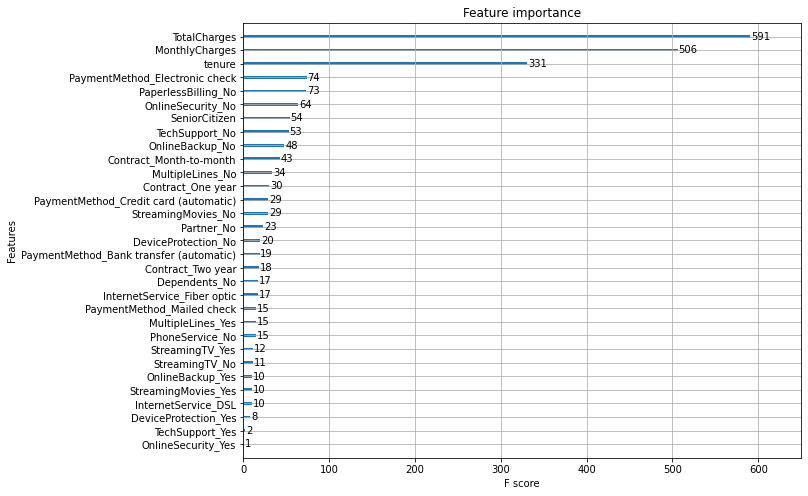

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

We can see that our model assigned more importance to TotalCharges and MonthlyCharges compared to others followed by the tenure


# In order to Decrease the amount of Churn in Customers, the Company is advised to lower the Total and Monthly charges and introduce more plans with a long term of engagement
